## Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np 
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from datetime import timedelta
import math
import matplotlib.pyplot as plt
from scipy.stats import sem, t
from scipy import mean
import scipy.stats as stats
import scipy
import warnings

## Import Training Data

In [2]:
df= pd.read_excel("D:\dataset\TrainingSet.xlsx")
df.head()

,customerID,MobileNo,CustomerLifetime(Days),InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Churn
0,2501-XWWTZ,919749880088,341,Fiber optic,-73,1.52,70.20,NO,NO,Yes
1,7954-MLBUN,917355065312,961,Fiber optic,-107,1.54,99.45,NO,YES,Yes
2,0719-SYFRB,919539346826,372,DSL,-107,1.57,61.65,YES,YES,Yes
3,9548-LIGTA,919914164769,1891,DSL,-105,1.59,81.05,YES,YES,No
4,7916-VCCPB,919701127772,496,Fiber optic,-107,1.59,73.25,NO,NO,No


## Convert Categorical Data into Numerical Values using Label Encoder


In [3]:
le_product=LabelEncoder()
df['InternetService_n'] = le_product.fit_transform(df['InternetService'])
df['OnlineSecurity_n'] = le_product.fit_transform(df['OnlineSecurity'])
df['CustomerCareSupport_n'] = le_product.fit_transform(df['CustomerCareSupport'])
df['Churn_n'] = le_product.fit_transform(df['Churn'])
df.head()

,customerID,MobileNo,CustomerLifetime(Days),InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Churn,InternetService_n,OnlineSecurity_n,CustomerCareSupport_n,Churn_n
0,2501-XWWTZ,919749880088,341,Fiber optic,-73,1.52,70.20,NO,NO,Yes,2,0,0,1
1,7954-MLBUN,917355065312,961,Fiber optic,-107,1.54,99.45,NO,YES,Yes,2,0,1,1
2,0719-SYFRB,919539346826,372,DSL,-107,1.57,61.65,YES,YES,Yes,0,1,1,1
3,9548-LIGTA,919914164769,1891,DSL,-105,1.59,81.05,YES,YES,No,0,1,1,0
4,7916-VCCPB,919701127772,496,Fiber optic,-107,1.59,73.25,NO,NO,No,2,0,0,0


## Feature Selection

In [4]:
inputs= df.drop(['customerID','Churn','Churn_n','MobileNo','OnlineSecurity','CustomerLifetime(Days)','CustomerCareSupport','InternetService'],axis=1)
train_data_features = inputs
train_data_features.head()

,NetworkSignalStrength,DataSpeed,MonthlyCharges,InternetService_n,OnlineSecurity_n,CustomerCareSupport_n
0,-73,1.52,70.20,2,0,0
1,-107,1.54,99.45,2,0,1
2,-107,1.57,61.65,0,1,1
3,-105,1.59,81.05,0,1,1
4,-107,1.59,73.25,2,0,0


## Target

In [5]:
train_data_label = df['Churn_n']
train_data_label.head()

0    1
1    1
2    1
3    0
4    0
Name: Churn_n, dtype: int32

## Import Logistic Regression from sklearn


In [6]:
model = LogisticRegression()


## Fitting Logistic Regression to the Training set


In [7]:
model.fit(train_data_features,train_data_label)


LogisticRegression()

## Import Test Data


In [8]:
df1 = pd.read_excel("D:\dataset\Testset.xls")
df1.head()
df2=pd.read_excel("D:\dataset\Testset.xls")

## Convert Categorical Data into Numerical Values using Label Encoder


In [9]:
le_product=LabelEncoder()
df1['InternetService_n'] = le_product.fit_transform(df1['InternetService'])
df1['OnlineSecurity_n'] = le_product.fit_transform(df1['OnlineSecurity'])
df1['CustomerCareSupport_n'] = le_product.fit_transform(df1['CustomerCareSupport'])
df1.head()

,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,InternetService_n,OnlineSecurity_n,CustomerCareSupport_n
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,1,1
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,2,0,0
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,2,0,0
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,1,1
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,1,0,0


## Feature Selection


In [10]:
test_data_features= df1.drop(['customerID','MobileNo','OnlineSecurity','CustomerCareSupport','InternetService'],axis=1)
Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

Y_predicted=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
outputs = df2.merge(Y_predicted,left_index=True, right_index=True)
model_prediction_results.head()


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,1
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,1


## PROBABILITY OF Network Signal(dbm)

In [11]:
model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])
model_churn_probability = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)
model_churn_probability.head()

,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.787023,0.212977
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.528234,0.471766
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,1,0.490519,0.509481
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.756117,0.243883
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,1,0.433723,0.566277


## PROBABILITY OF Data Speed(MB)

In [12]:
train_data_features= train_data_features[['DataSpeed','MonthlyCharges','InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]
test_data_features= test_data_features[['DataSpeed','MonthlyCharges','InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]

model = LogisticRegression()
model.fit(train_data_features,train_data_label)

Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])


model_probability1 = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)

model_probabilityNDMIOC = pd.DataFrame(model_probability1,columns=['Predict Churn','Probability of NOT CHURN','Probability of CHURN'])
model_probabilityNDMIOC.columns = ['PREDICT_CHURN_NDMIOC', 'Probability of NOT CHURN_NDMIOC', 'Probability of CHURN_NDMIOC']
model_probabilityNDMIOC = model_probabilityNDMIOC[['Probability of NOT CHURN_NDMIOC', 'Probability of CHURN_NDMIOC']]
model_probability1.head()
#model_probabilityNDMIOC.head()


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.774115,0.225885
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.505619,0.494381
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,1,0.467848,0.532152
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.671390,0.328610
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,1,0.416256,0.583744


## PROBABILITY OF MONTHLY CHARGES

In [13]:
train_data_features= train_data_features[['MonthlyCharges','InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]
test_data_features = test_data_features[['MonthlyCharges','InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]

model = LogisticRegression()
model.fit(train_data_features,train_data_label)
Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])


model_probability2 = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)

model_probabilityDMIOC = pd.DataFrame(model_probability2,columns=['Predict Churn','Probability of NOT CHURN','Probability of CHURN'])
model_probabilityDMIOC.columns = ['PREDICT_CHURN_DMIOC', 'Probability of NOT CHURN_DMIOC', 'Probability of CHURN_DMIOC']
model_probabilityDMIOC = model_probabilityDMIOC[['Probability of NOT CHURN_DMIOC', 'Probability of CHURN_DMIOC']]
model_probabilityDMIOC.head()
model_probability2.head() 


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.716391,0.283609
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.507137,0.492863
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,0,0.507271,0.492729
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.719354,0.280646
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,1,0.483998,0.516002


## PROBABILITY of Internet Service

In [14]:
train_data_features= train_data_features[['InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]
test_data_features = test_data_features[['InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]

model = LogisticRegression()
model.fit(train_data_features,train_data_label)
Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])


model_probability3 = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)

model_probabilityMIOC = pd.DataFrame(model_probability3,columns=['Predict Churn','Probability of NOT CHURN','Probability of CHURN'])
model_probabilityMIOC.columns = ['PREDICT_CHURN_MIOC', 'Probability of NOT CHURN_MIOC', 'Probability of CHURN_MIOC']
model_probabilityMIOC = model_probabilityMIOC[['Probability of NOT CHURN_MIOC', 'Probability of CHURN_MIOC']]
model_probabilityMIOC.head()
model_probability3.head()

,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.710994,0.289006
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,1,0.459337,0.540663
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,1,0.459337,0.540663
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.710994,0.289006
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,0,0.526572,0.473428


## PROBABILITY of Online Security


In [15]:
train_data_features= train_data_features[['OnlineSecurity_n','CustomerCareSupport_n']]
test_data_features = test_data_features[['OnlineSecurity_n','CustomerCareSupport_n']]

model = LogisticRegression()
model.fit(train_data_features,train_data_label)
Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])


model_probability4 = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)

model_probabilityIOC = pd.DataFrame(model_probability4,columns=['Predict Churn','Probability of NOT CHURN','Probability of CHURN'])
model_probabilityIOC.columns = ['PREDICT_CHURN_IOC', 'Probability of NOT CHURN_IOC', 'Probability of CHURN_IOC']
model_probabilityIOC = model_probabilityIOC[['Probability of NOT CHURN_IOC', 'Probability of CHURN_IOC']]
model_probabilityIOC.head()
model_probability4.head()


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.660862,0.339138
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.507181,0.492819
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,0,0.507181,0.492819
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.660862,0.339138
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,0,0.507181,0.492819


## PROBABILITY OF Customer Care Support

In [16]:
train_data_features= train_data_features[['CustomerCareSupport_n']]
test_data_features = test_data_features[['CustomerCareSupport_n']]


model = LogisticRegression()
model.fit(train_data_features,train_data_label)

Y_predicted=model.predict(test_data_features)
model_prediction=pd.DataFrame(Y_predicted,columns=['Predict Churn'])
model_prediction_results =df2.merge(model_prediction,left_index=True,right_index=True)

model_prediction_results_probability = model.predict_proba(test_data_features)
model_prediction_results_probability = pd.DataFrame(model_prediction_results_probability,columns=['Probability of NOT CHURN','Probability of CHURN'])


model_probability5 = model_prediction_results.merge(model_prediction_results_probability,left_index=True,right_index=True)

model_probabilityOC = pd.DataFrame(model_probability5,columns=['Predict Churn','Probability of NOT CHURN','Probability of CHURN'])
model_probabilityOC.columns = ['PREDICT_CHURN_OC', 'Probability of NOT CHURN_OC', 'Probability of CHURN_OC']
model_probabilityOC = model_probabilityOC[['Probability of NOT CHURN_OC', 'Probability of CHURN_OC']]
model_probabilityOC.head()
model_probability5.head()


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN,Probability of CHURN
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.640502,0.359498
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.517616,0.482384
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,0,0.517616,0.482384
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.640502,0.359498
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,0,0.517616,0.482384


In [17]:
model_123456 = model_prediction_results.merge(model_probabilityNDMIOC,left_index=True,right_index=True)
model_12345 = model_123456.merge(model_probabilityDMIOC,left_index=True,right_index=True)
model_1234 = model_12345.merge(model_probabilityMIOC,left_index=True,right_index=True)
model_123 = model_1234.merge(model_probabilityIOC,left_index=True,right_index=True)
model_12 = model_123.merge(model_probabilityOC,left_index=True,right_index=True)
model_12.head()

,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN_NDMIOC,Probability of CHURN_NDMIOC,Probability of NOT CHURN_DMIOC,Probability of CHURN_DMIOC,Probability of NOT CHURN_MIOC,Probability of CHURN_MIOC,Probability of NOT CHURN_IOC,Probability of CHURN_IOC,Probability of NOT CHURN_OC,Probability of CHURN_OC
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.774115,0.225885,0.716391,0.283609,0.710994,0.289006,0.660862,0.339138,0.640502,0.359498
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.505619,0.494381,0.507137,0.492863,0.459337,0.540663,0.507181,0.492819,0.517616,0.482384
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,0,0.467848,0.532152,0.507271,0.492729,0.459337,0.540663,0.507181,0.492819,0.517616,0.482384
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.671390,0.328610,0.719354,0.280646,0.710994,0.289006,0.660862,0.339138,0.640502,0.359498
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,0,0.416256,0.583744,0.483998,0.516002,0.526572,0.473428,0.507181,0.492819,0.517616,0.482384


## Weightage calculation

In [18]:
model_123456['Weightage of NetworkSignalStrength N_NCH'] = model_prediction_results_probability['Probability of NOT CHURN'] - model_probability1['Probability of NOT CHURN']
model_123456['Weightage of NetworkSignalStrength N_NCH'] = model_123456['Weightage of NetworkSignalStrength N_NCH'] 

model_123456['Weightage of DataSpeed D_NCH'] = model_probability1['Probability of NOT CHURN'] - model_probability2['Probability of NOT CHURN']
model_123456['Weightage of DataSpeed D_NCH'] = model_123456['Weightage of DataSpeed D_NCH']

model_123456['Weightage of MonthlyCharges M_NCH'] = model_probability2['Probability of NOT CHURN'] - model_probability3['Probability of NOT CHURN']
model_123456['Weightage of MonthlyCharges M_NCH'] = model_123456['Weightage of MonthlyCharges M_NCH']

model_123456['Weightage of InternetService I_NCH'] = model_probability3['Probability of NOT CHURN'] - model_probability4['Probability of NOT CHURN']
model_123456['Weightage of InternetService I_NCH'] = model_123456['Weightage of InternetService I_NCH']

model_123456['Weightage of OnlineSecurity O_NCH'] = model_probability4['Probability of NOT CHURN'] - model_probability5['Probability of NOT CHURN']
model_123456['Weightage of OnlineSecurity O_NCH'] = model_123456['Weightage of OnlineSecurity O_NCH']

model_123456['Weightage of NetworkSignalStrength N_CH'] = model_prediction_results_probability['Probability of CHURN'] - model_probability1['Probability of CHURN']
model_123456['Weightage of NetworkSignalStrength N_CH'] = model_123456['Weightage of NetworkSignalStrength N_CH'] 

model_123456['Weightage of DataSpeed D_CH'] = model_probability1['Probability of CHURN'] - model_probability2['Probability of CHURN']
model_123456['Weightage of DataSpeed D_CH'] = model_123456['Weightage of DataSpeed D_CH']

model_123456['Weightage of MonthlyCharges M_CH'] = model_probability2['Probability of CHURN'] - model_probability3['Probability of CHURN']
model_123456['Weightage of MonthlyCharges M_CH'] = model_123456['Weightage of MonthlyCharges M_CH']

model_123456['Weightage of InternetService I_CH'] = model_probability3['Probability of CHURN'] - model_probability4['Probability of CHURN']
model_123456['Weightage of InternetService I_CH'] = model_123456['Weightage of InternetService I_CH']

model_123456['Weightage of OnlineSecurity O_CH'] = model_probability4['Probability of CHURN'] - model_probability5['Probability of CHURN']
model_123456['Weightage of OnlineSecurity O_CH'] = model_123456['Weightage of OnlineSecurity O_CH']

model_123456.head()


,customerID,MobileNo,InternetService,NetworkSignalStrength,DataSpeed,MonthlyCharges,OnlineSecurity,CustomerCareSupport,Predict Churn,Probability of NOT CHURN_NDMIOC,...,Weightage of NetworkSignalStrength N_NCH,Weightage of DataSpeed D_NCH,Weightage of MonthlyCharges M_NCH,Weightage of InternetService I_NCH,Weightage of OnlineSecurity O_NCH,Weightage of NetworkSignalStrength N_CH,Weightage of DataSpeed D_CH,Weightage of MonthlyCharges M_CH,Weightage of InternetService I_CH,Weightage of OnlineSecurity O_CH
0,2954-PIBKO,919946050772,DSL,-106,26.87,64.15,YES,YES,0,0.774115,...,-0.133612,0.057723,0.005398,0.050132,0.020359,0.133612,-0.057723,-0.005398,-0.050132,-0.020359
1,6345-FZOQH,917656060678,No,-107,7.59,19.90,NO,NO,0,0.505619,...,0.011997,-0.001518,0.047800,-0.047843,-0.010435,-0.011997,0.001518,-0.047800,0.047843,0.010435
2,2984-RGEYA,917416627498,No,-107,0.20,19.75,NO,NO,0,0.467848,...,0.049768,-0.039422,0.047933,-0.047843,-0.010435,-0.049768,0.039422,-0.047933,0.047843,0.010435
3,8626-PTQGE,917680953574,DSL,-140,0.76,60.05,YES,YES,0,0.671390,...,-0.030888,-0.047963,0.008360,0.050132,0.020359,0.030888,0.047963,-0.008360,-0.050132,-0.020359
4,0979-PHULV,918589921561,Fiber optic,-107,1.05,99.45,NO,NO,0,0.416256,...,0.101360,-0.067742,-0.042575,0.019392,-0.010435,-0.101360,0.067742,0.042575,-0.019392,0.010435


## Write the model to a file


In [19]:
#model_123456.to_excel('ans_data.xls',index=False)

## Accuracy of the model

In [20]:
accuracy=model.score(train_data_features,train_data_label)
print("Accuracy of the model is",accuracy*100)

Accuracy of the model is 56.083650190114064


## Finding CONFIDENCE LEVEL

In [21]:
confidence = 0.95
train_data=inputs
data = train_data[['NetworkSignalStrength','DataSpeed','MonthlyCharges','InternetService_n','OnlineSecurity_n','CustomerCareSupport_n']]
n = len(data)
m = np.mean(data)
stderr =scipy.stats.sem(data)
h = stderr*t.ppf((1+confidence)/2, n-1)
start = m-h
start=pd.DataFrame(start,columns=['start'])
end=m+h
end=pd.DataFrame(end,columns=['end'])
confidenceinterval= start.merge(end,left_index=True, right_index=True)
confidenceinterval


,start,end
NetworkSignalStrength,-99.958503,-97.661269
DataSpeed,10.905014,13.684758
MonthlyCharges,66.323058,71.541581
InternetService_n,1.053103,1.205452
OnlineSecurity_n,0.290459,0.371138
CustomerCareSupport_n,0.310771,0.392651


In [22]:
#con_coef = .95
#alpha = 1. - con_coef


In [23]:
x_bar = outputs["Predict Churn"].mean()
x_bar


0.2727272727272727

In [24]:
sigma = outputs["Predict Churn"].std()
sigma

0.4482822077654242

In [25]:
z_critical = stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [26]:
#zinterval = stats.norm.interval(alpha=con_coef)
#zinterval

In [27]:
standard_error = sigma / math.sqrt(n)
standard_error

0.019546033108135786

In [28]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error

In [29]:
CI_lower, CI_upper

(0.2344177517946991, 0.3110367936598463)

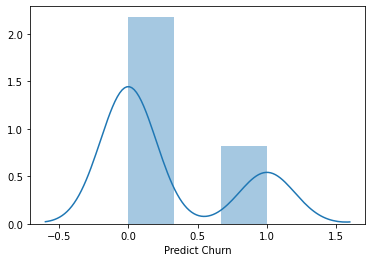

In [30]:
import seaborn as sns
p=sns.distplot(outputs["Predict Churn"])

## DATA VISUALIZATION

21 21
56 56


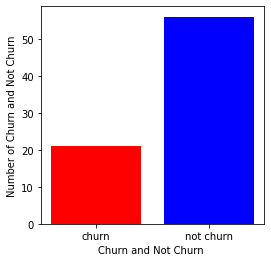

In [31]:
churn = outputs.loc[outputs["Predict Churn"]== 1]
normal = outputs.loc[outputs["Predict Churn"]== 0]
print(len(churn),churn.shape[0])
print(len(normal),normal.shape[0])
number_of_churn =[21,56]
category=["churn","not churn"]
plt.figure(figsize=(4,4))
plt.bar(category,number_of_churn,label="number",color=['red','blue']) 
plt.xlabel("Churn and Not Churn ")
plt.ylabel("Number of Churn and Not Churn")
plt.show()